In [1]:
library(ggplot2)

In [2]:
load("modelssaved/cellpose_f25_nmfgen_over20genes.RData")

In [3]:
exp_norm = out$exposures/rowSums(out$exposures)
cluster = apply(exp_norm,1,which.max)


In [6]:
# get cells not included
path1 = '/gladstone/engelhardt/pelka-collaboration/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/cellpose_cell_by_gene_goodgenes_noblanks.csv'
count = read.csv(path1, row.names = 1)


In [12]:
no_count = which(rowSums(count > 0) < 20)

In [13]:


path2 = '/gladstone/engelhardt/pelka-collaboration/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/cellpose_cell_metadata.csv'
metadata = read.csv(path2, row.names = 1)

location = metadata[,c('center_x','center_y')]
location = as.matrix(location)
print(nrow(location))
location = location[-no_count,]


[1] 844468


In [14]:
nrow(location)

[1] 767872

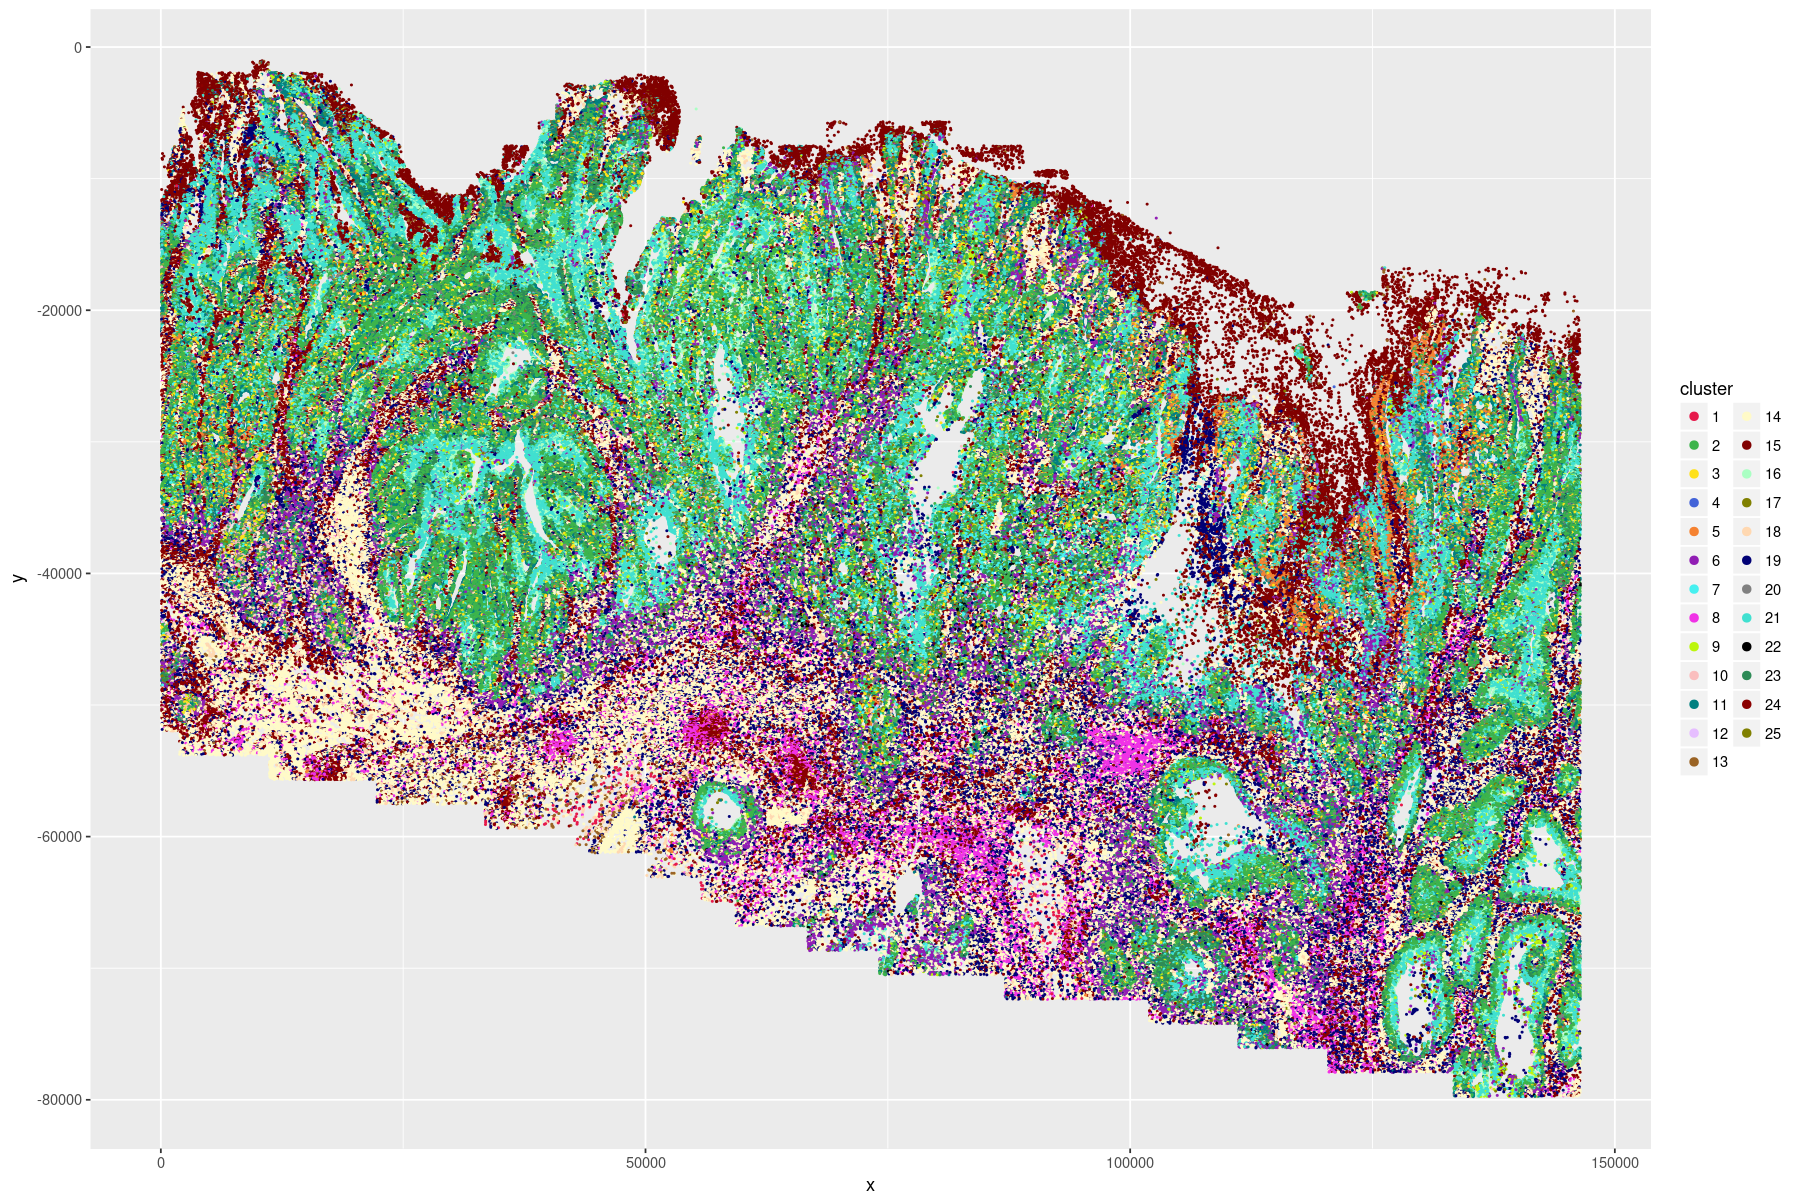

In [16]:
myCol = c('#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#40e0d0', '#000000', '#2e8b57', '#8b0000', '#808000','#483d8b','#8b008b')

cluster_dat = data.frame(x = location[,1], y = -location[,2], cluster = as.factor(cluster))
options(repr.plot.width=15, repr.plot.height=10)
ggplot(cluster_dat, aes(x = x, y = y, col = cluster))+
geom_point(cex = 0.2)+
scale_color_manual(values=myCol)+
guides(color = guide_legend(override.aes = list(size = 2)))